In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data understanding

In [2]:
df = pd.read_csv("words_glasgow.csv", skipinitialspace=True, sep=',')

In [3]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


In [4]:
df.dtypes

word                object
length               int64
arousal            float64
valence            float64
dominance          float64
concreteness       float64
imageability       float64
familiarity        float64
aoa                float64
semsize            float64
gender             float64
polysemy             int64
web_corpus_freq    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   word             4682 non-null   object 
 1   length           4682 non-null   int64  
 2   arousal          4682 non-null   float64
 3   valence          4682 non-null   float64
 4   dominance        4682 non-null   float64
 5   concreteness     4682 non-null   float64
 6   imageability     4682 non-null   float64
 7   familiarity      4682 non-null   float64
 8   aoa              4682 non-null   float64
 9   semsize          4682 non-null   float64
 10  gender           4682 non-null   float64
 11  polysemy         4682 non-null   int64  
 12  web_corpus_freq  4668 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 475.6+ KB


In [6]:
df.describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4.668000e+03
mean,6.348355,4.678129,5.086797,5.044939,4.566273,4.723018,5.271335,4.143427,4.136403,4.099933,0.080948,2.988976e+07
std,2.006230,1.097163,1.594344,0.930669,1.433689,1.363110,0.921218,1.252770,1.023293,0.912293,0.272785,8.490144e+07
min,2.000000,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.375000,1.000000,0.000000,1.277000e+04
25%,5.000000,3.849000,4.115000,4.529000,3.242000,3.519250,4.706000,3.114000,3.438000,3.606000,0.000000,1.671100e+06
50%,6.000000,4.571000,5.290000,5.123000,4.471000,4.677000,5.438000,4.177000,4.186500,4.121000,0.000000,5.702982e+06
75%,8.000000,5.419000,6.088000,5.600000,5.971000,6.032000,5.969000,5.152000,4.882000,4.656000,0.000000,2.232705e+07
max,16.000000,8.177000,8.647000,8.371000,6.938000,6.941000,6.939000,6.971000,6.912000,6.971000,1.000000,2.022460e+09


In [7]:
df.describe(include="object")

,word
count,4682
unique,4682
top,carriage
freq,1


In [8]:
df.isnull().any()

word               False
length             False
arousal            False
valence            False
dominance          False
concreteness       False
imageability       False
familiarity        False
aoa                False
semsize            False
gender             False
polysemy           False
web_corpus_freq     True
dtype: bool

In [9]:
df.isnull().sum()

word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
dtype: int64

In [10]:
df['polysemy'].value_counts()

0    4303
1     379
Name: polysemy, dtype: int64

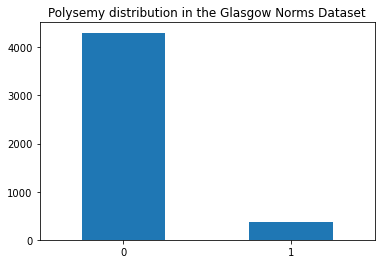

In [11]:
df['polysemy'].value_counts().plot(kind='bar', title='Polysemy distribution in the Glasgow Norms Dataset')
plt.xticks(rotation = 0)
plt.show()

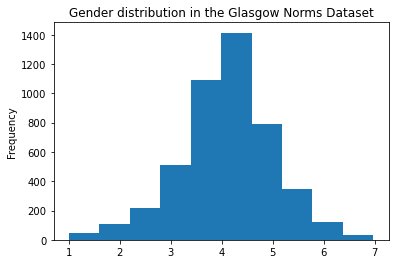

In [12]:
df['gender'].plot(kind='hist', title='Gender distribution in the Glasgow Norms Dataset')
plt.xticks(rotation = 0)
plt.show()

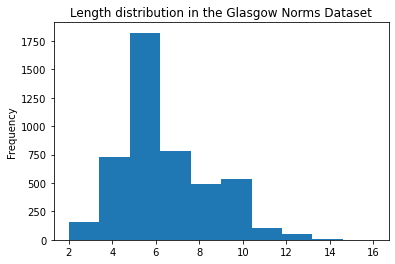

In [13]:
df['length'].plot(kind='hist', title='Length distribution in the Glasgow Norms Dataset')
plt.xticks(rotation = 0)
plt.show()

C:\Users\Erica\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


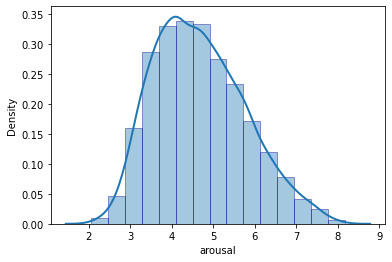

In [14]:
sns.distplot(df['arousal'], hist=True, kde=True, bins=15, hist_kws={'edgecolor':'darkblue'}, kde_kws={'linewidth': 2})

In [15]:
pclass_xt = pd.crosstab(df['polysemy'], df['length'])
pclass_xt

length,2,3,4,5,6,7,8,9,10,11,12,13,14,16
polysemy,,,,,,,,,,,,,,
0,2,120,592,794,860,754,484,314,220,108,39,11,4,1
1,0,37,140,118,50,23,8,2,1,0,0,0,0,0


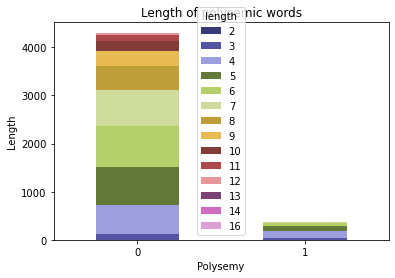

In [16]:
pclass_xt = pd.crosstab(df['polysemy'], df['length'])
pclass_xt

pclass_xt.plot(kind='bar', stacked=True, 
                   title='Length of polysemic words', colormap = "tab20b")
plt.xlabel('Polysemy')
plt.ylabel('Length')
plt.xticks(rotation = 0)
plt.show()

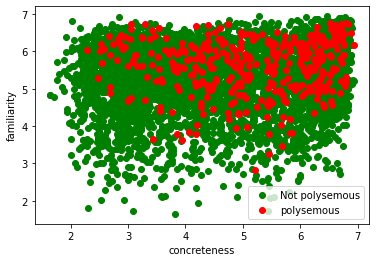

In [17]:
plt.scatter(df[df['polysemy'] == 0]['concreteness'], 
            df[df['polysemy'] == 0]['familiarity'], color='g', label='Not polysemous')

plt.scatter(df[df['polysemy'] == 1]['concreteness'], 
            df[df['polysemy'] == 1]['familiarity'], color='r',label='polysemous')
plt.xlabel('concreteness')
plt.ylabel('familiarity')
plt.legend()
plt.show()

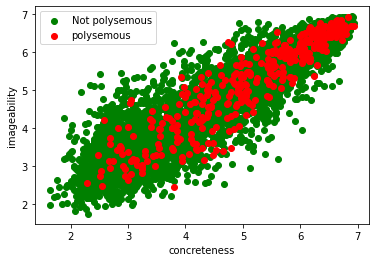

In [18]:
plt.scatter(df[df['polysemy'] == 0]['concreteness'], 
            df[df['polysemy'] == 0]['imageability'], color='g', label='Not polysemous')

plt.scatter(df[df['polysemy'] == 1]['concreteness'], 
            df[df['polysemy'] == 1]['imageability'], color='r',label='polysemous')
plt.xlabel('concreteness')
plt.ylabel('imageability')
plt.legend()
plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, '1-9 scale feature distribution')

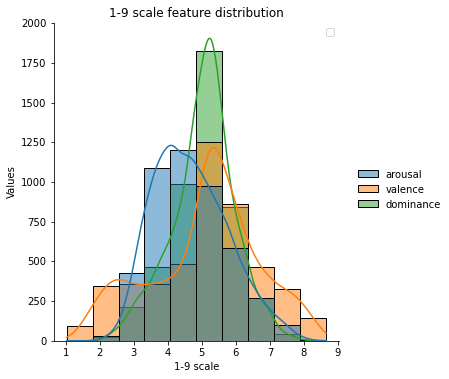

In [19]:
sns.displot([df["arousal"], df["valence"], df["dominance"]], kde = True, bins = 10)
plt.legend()
plt.xlabel('1-9 scale')
plt.ylabel("Values")
plt.title('1-9 scale feature distribution')

No handles with labels found to put in legend.


Text(0.5, 1.0, '1-7 scale feature distribution')

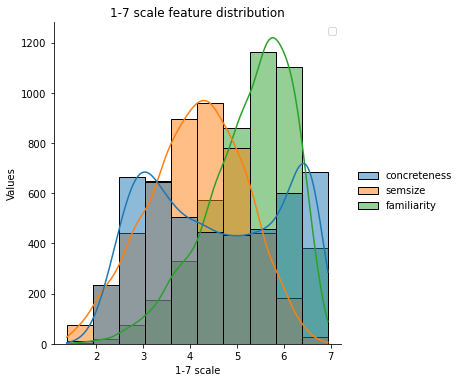

In [20]:
sns.displot([df["concreteness"], df["semsize"], df["familiarity"]], bins = 10, kde = True)
plt.legend()
plt.xlabel('1-7 scale')
plt.ylabel("Values")
plt.title('1-7 scale feature distribution')

C:\Users\Erica\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Erica\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Erica\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Density')

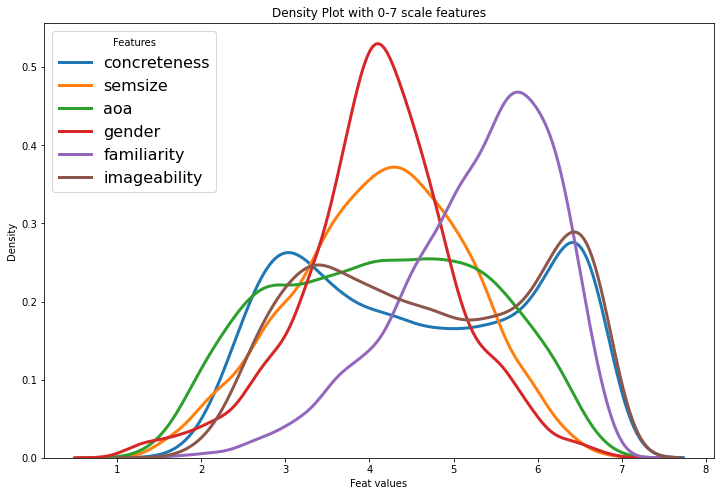

In [21]:
feats = ['concreteness', 'semsize', 'aoa', 'gender', 'familiarity', 'imageability']
plt.figure(figsize=(12, 8))

# Iterate through the five airlines
for feat in feats:
    # Subset to the airline
    
    sns.distplot(df[feat], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = feat)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Features')
plt.title('Density Plot with 0-7 scale features')
plt.xlabel('Feat values')
plt.ylabel('Density')

In [33]:
df = df.sort_values(by="web_corpus_freq", ascending=False)
ymin, ymax = min(df.web_corpus_freq), max(df.web_corpus_freq)

# Set the y limits making the maximum 5% greater


In [75]:
df[df.web_corpus_freq > 2000000000]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
121,all,3,3.625,5.469,5.419,3.313,2.969,6.645,1.807,5.839,4.0,0,2.022460e+09


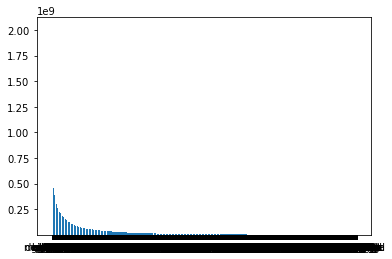

In [36]:
plt.bar(df["word"], height=df.web_corpus_freq.values)
plt.ylim(ymin, 1.05 * ymax)
plt.xlabel("")
plt.show()

## Data preparation

### Correlazione tra features

In [19]:
df.corr()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679


In [20]:
df.corr(method='spearman')

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
length,1.000000,0.147804,0.053738,0.007002,-0.202149,-0.202792,-0.141403,0.412430,0.318125,-0.002198,-0.249338,-0.244337
arousal,0.147804,1.000000,0.354573,0.356341,-0.236691,-0.080643,0.167961,-0.004926,0.514712,-0.106969,-0.084989,0.068559
valence,0.053738,0.354573,1.000000,0.702252,0.042002,0.091276,0.294600,-0.188121,0.121232,-0.429474,0.000449,0.300342
dominance,0.007002,0.356341,0.702252,1.000000,0.042363,0.080612,0.234658,-0.141472,0.098469,-0.111078,0.051475,0.223458
concreteness,-0.202149,-0.236691,0.042002,0.042363,1.000000,0.903587,0.097511,-0.387694,-0.400490,0.141523,0.112280,0.025347
imageability,-0.202792,-0.080643,0.091276,0.080612,0.903587,1.000000,0.209765,-0.498524,-0.319086,0.063690,0.101208,0.022608
familiarity,-0.141403,0.167961,0.294600,0.234658,0.097511,0.209765,1.000000,-0.670507,0.045278,-0.217116,0.104050,0.579648
aoa,0.412430,-0.004926,-0.188121,-0.141472,-0.387694,-0.498524,-0.670507,1.000000,0.224328,0.144490,-0.180417,-0.413056
semsize,0.318125,0.514712,0.121232,0.098469,-0.400490,-0.319086,0.045278,0.224328,1.000000,0.148675,-0.137745,0.161435
gender,-0.002198,-0.106969,-0.429474,-0.111078,0.141523,0.063690,-0.217116,0.144490,0.148675,1.000000,0.025161,-0.075323


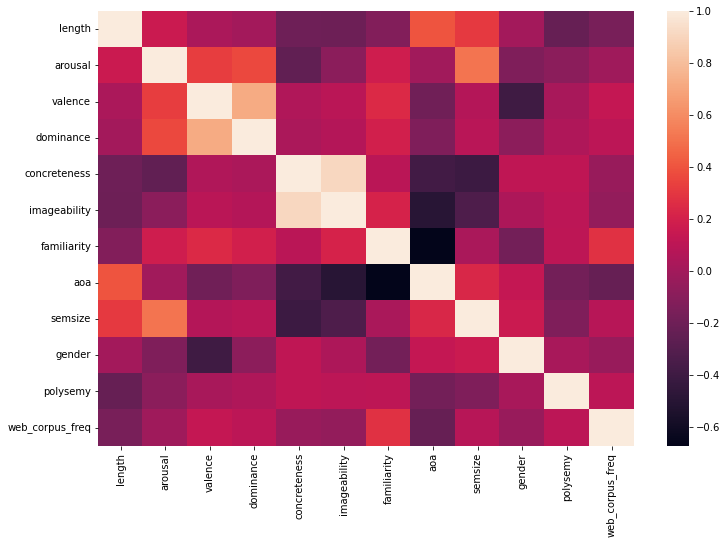

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr());

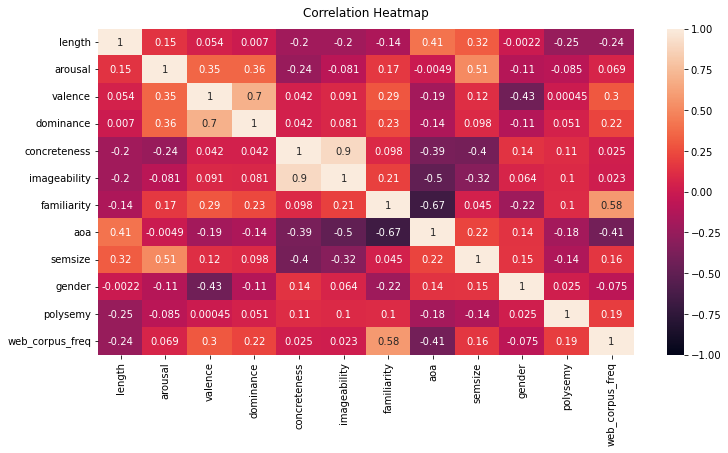

In [22]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(method = "spearman"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

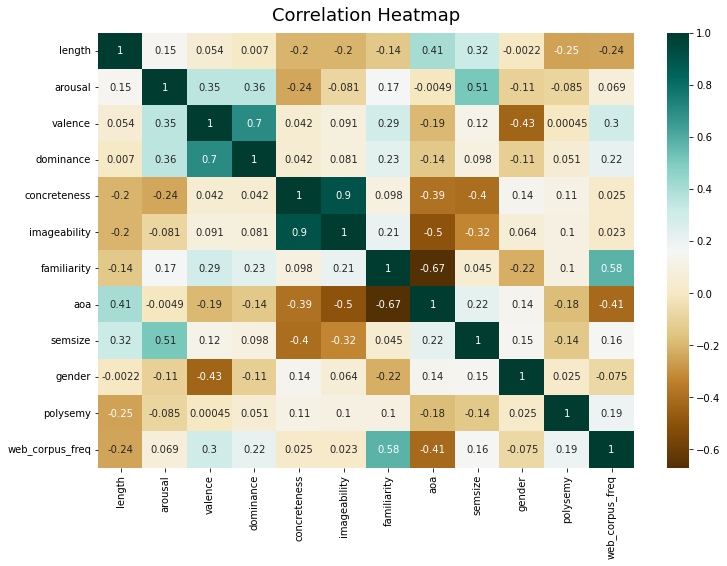

In [23]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(method = "spearman"), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [24]:
## prove per capire quale feat eliminare tra concreteness e imageability

In [25]:
(df[df["polysemy"] == 1]["concreteness"]>3.5).sum()

334

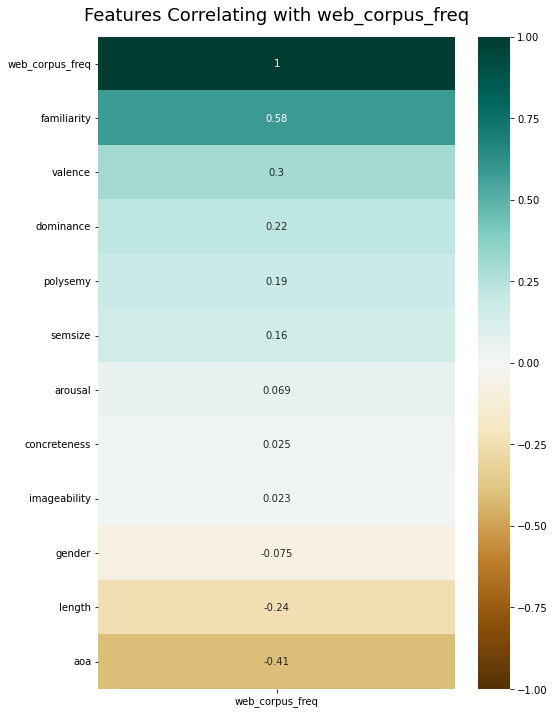

In [26]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(method = "spearman")[['web_corpus_freq']].sort_values(by='web_corpus_freq', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with web_corpus_freq', fontdict={'fontsize':18}, pad=16);

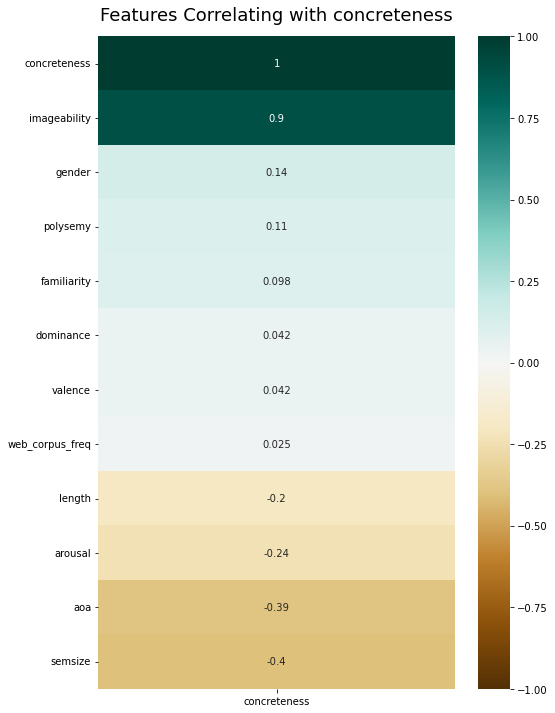

In [27]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(method = "spearman")[['concreteness']].sort_values(by='concreteness', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with concreteness', fontdict={'fontsize':18}, pad=16);

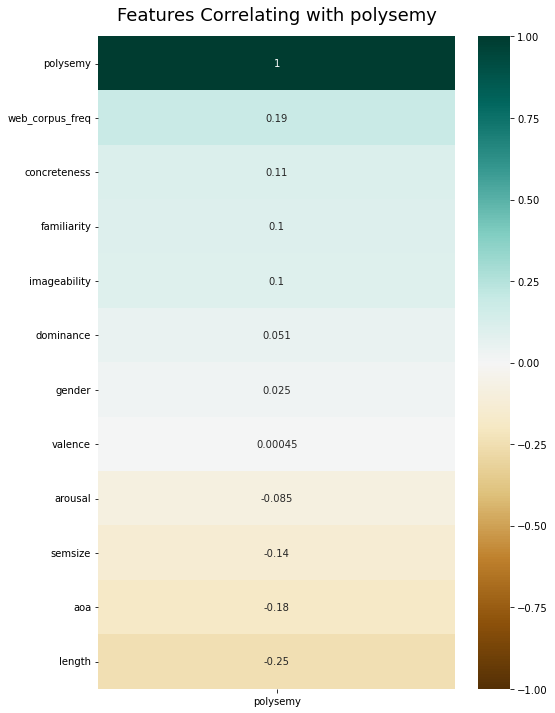

In [28]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(method = "spearman")[['polysemy']].sort_values(by='polysemy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with polysemy', fontdict={'fontsize':18}, pad=16);

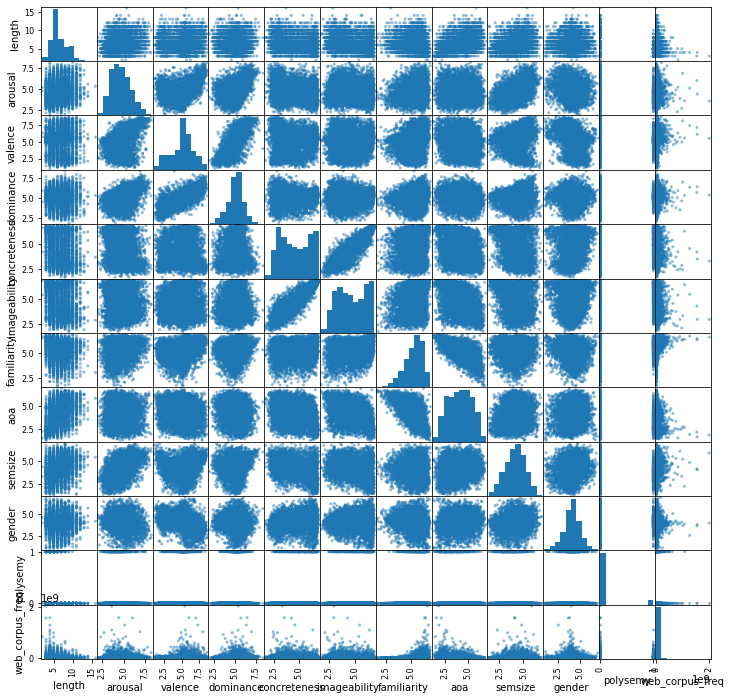

In [29]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

### Outlier

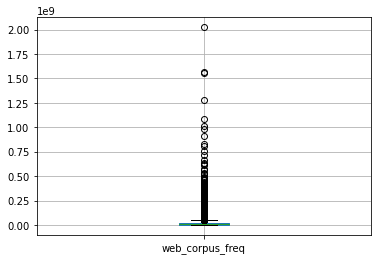

In [41]:
boxplot = df.boxplot(column=['web_corpus_freq'])

In [42]:
df_boxplot = df.copy()
del df_boxplot["web_corpus_freq"]
del df_boxplot["polysemy"]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

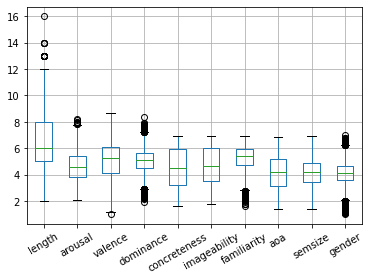

In [43]:
df_boxplot.boxplot(return_type="axes")
plt.xticks(rotation = 30)

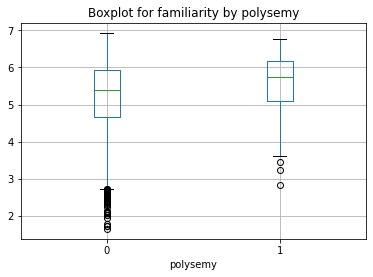

In [44]:
boxplot = df.boxplot(column=['familiarity'], by='polysemy')
plt.title('')
plt.suptitle('')
boxplot.set_title('Boxplot for familiarity by polysemy')
plt.show()


In [78]:
(df[df["web_corpus_freq"]>2000000])

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
121,all,3,3.625,5.469,5.419,3.313,2.969,6.645,1.807,5.839,4.000,0,2.022460e+09
1988,have,4,4.438,6.059,6.455,3.500,2.971,6.382,1.600,4.059,3.824,0,1.564203e+09
2796,new,3,6.031,7.063,5.710,4.219,4.313,6.484,2.125,4.133,3.667,0,1.551259e+09
2057,home,4,5.129,7.333,6.375,4.571,5.484,6.750,1.875,4.818,2.567,0,1.276852e+09
2954,page,4,3.633,5.516,5.375,6.357,6.448,6.414,2.636,2.281,3.897,1,1.082122e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,metropolis,10,5.194,5.867,5.156,4.727,5.125,3.375,6.273,5.970,4.364,0,2.013253e+06
2245,ironing,7,2.219,4.343,4.424,5.849,6.147,5.424,3.457,3.121,2.636,0,2.009586e+06
3787,slap,4,5.471,2.529,5.188,5.697,5.912,6.065,3.057,4.182,3.182,0,2.007220e+06
495,botany,6,3.345,5.250,4.889,5.138,3.938,3.424,6.061,4.100,3.484,0,2.003091e+06


### Missing values

In [37]:
# elimino i missing values
df = df.dropna()

In [38]:
#ricontrollo se ci sono mv
df.isna().sum()

word               0
length             0
arousal            0
valence            0
dominance          0
concreteness       0
imageability       0
familiarity        0
aoa                0
semsize            0
gender             0
polysemy           0
web_corpus_freq    0
dtype: int64

In [39]:
df

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
121,all,3,3.625,5.469,5.419,3.313,2.969,6.645,1.807,5.839,4.000,0,2.022460e+09
1988,have,4,4.438,6.059,6.455,3.500,2.971,6.382,1.600,4.059,3.824,0,1.564203e+09
2796,new,3,6.031,7.063,5.710,4.219,4.313,6.484,2.125,4.133,3.667,0,1.551259e+09
2057,home,4,5.129,7.333,6.375,4.571,5.484,6.750,1.875,4.818,2.567,0,1.276852e+09
2954,page,4,3.633,5.516,5.375,6.357,6.448,6.414,2.636,2.281,3.897,1,1.082122e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,embezzle,8,4.967,2.548,5.103,2.939,3.031,2.714,6.618,4.645,4.548,0,2.488300e+04
630,candyfloss,10,4.969,6.735,5.086,6.242,6.559,5.121,2.771,2.971,2.485,0,2.312800e+04
1940,habituate,9,3.483,5.067,4.448,2.067,1.821,3.000,6.500,4.200,3.800,0,1.915500e+04
1666,foible,6,5.067,4.467,4.250,2.533,2.529,2.031,6.579,3.357,3.294,0,1.832800e+04


In [36]:
del df["imageability"]


In [37]:
df.to_csv("df_classification.csv", index = False)

In [38]:
del df["web_corpus_freq"]

In [39]:
df

,word,length,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender,polysemy
0,abattoir,8,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391,0
1,abbey,5,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303,0
2,abbreviate,10,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971,0
3,abdicate,8,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167,0
4,abdication,10,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571,0
...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,3.167,6.036,5.464,5.269,0
4678,zero,4,4.031,4.182,4.567,2.688,6.269,2.636,1.758,4.172,0
4679,zest,4,5.969,6.818,6.121,4.438,4.000,5.364,2.636,3.452,0
4680,zoo,3,5.909,6.235,5.485,6.118,5.655,2.324,4.844,4.059,0


In [40]:
df.to_csv("df_clustering.csv", index = False)